In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# ระบุตำแหน่ง ไฟล์

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# คลาส

In [3]:
NUM_CLASSES = 5

# อ่านค่า Data set

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# การเปิดใช้งานและสร้างเลเยอร์ 

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# ตรวจสอบโมเดลและเรียกกลับ
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# รวมรวมแบบจำลองโมเดล
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 1.7050 - accuracy: 0.1455
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 1s 1s/step - loss: 1.7050 - accuracy: 0.1455 - val_loss: 1.5704 - val_accuracy: 0.1622
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 1.6461 - accuracy: 0.1364
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 1.6461 - accuracy: 0.1364 - val_loss: 1.5633 - val_accuracy: 0.1622
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 1.5952 - accuracy: 0.2273
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 44ms/step - loss: 1.5952 - accuracy: 0.2273 - val_loss: 1.5574 - val_accuracy: 0.1622
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 1.6292 - accuracy: 0.2000
Epoch 4: savin

1/1 [==============================] - 0s 42ms/step - loss: 1.4953 - accuracy: 0.2636 - val_loss: 1.4564 - val_accuracy: 0.4054
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 1.4854 - accuracy: 0.2455
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 41ms/step - loss: 1.4854 - accuracy: 0.2455 - val_loss: 1.4519 - val_accuracy: 0.4054
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 1.4658 - accuracy: 0.3091
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 1.4658 - accuracy: 0.3091 - val_loss: 1.4474 - val_accuracy: 0.4054
Epoch 31/1000
1/1 [==============================] - ETA: 0s - loss: 1.5137 - accuracy: 0.3000
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 41ms/step - loss: 1.5137 - accuracy: 0.3000 - val_loss: 1.

Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 1.3847 - accuracy: 0.4818
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 41ms/step - loss: 1.3847 - accuracy: 0.4818 - val_loss: 1.2922 - val_accuracy: 0.4595
Epoch 57/1000
1/1 [==============================] - ETA: 0s - loss: 1.4357 - accuracy: 0.2818
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 44ms/step - loss: 1.4357 - accuracy: 0.2818 - val_loss: 1.2869 - val_accuracy: 0.4595
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 1.3511 - accuracy: 0.3818
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 1.3511 - accuracy: 0.3818 - val_loss: 1.2813 - val_accuracy: 0.4595
Epoch 59/1000
1/1 [==============================] - ETA: 0s - loss: 1.3816 - accuracy: 0.3545
Epoch

1/1 [==============================] - ETA: 0s - loss: 1.2557 - accuracy: 0.5545
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 41ms/step - loss: 1.2557 - accuracy: 0.5545 - val_loss: 1.1128 - val_accuracy: 0.7027
Epoch 84/1000
1/1 [==============================] - ETA: 0s - loss: 1.2381 - accuracy: 0.5091
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 1.2381 - accuracy: 0.5091 - val_loss: 1.1056 - val_accuracy: 0.7027
Epoch 85/1000
1/1 [==============================] - ETA: 0s - loss: 1.2946 - accuracy: 0.4818
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 1.2946 - accuracy: 0.4818 - val_loss: 1.0986 - val_accuracy: 0.7027
Epoch 86/1000
1/1 [==============================] - ETA: 0s - loss: 1.3244 - accuracy: 0.4364
Epoch 86: saving mo

1/1 [==============================] - ETA: 0s - loss: 1.2130 - accuracy: 0.4727
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 1.2130 - accuracy: 0.4727 - val_loss: 0.9286 - val_accuracy: 0.7297
Epoch 111/1000
1/1 [==============================] - ETA: 0s - loss: 1.2079 - accuracy: 0.4909
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 1.2079 - accuracy: 0.4909 - val_loss: 0.9217 - val_accuracy: 0.7297
Epoch 112/1000
1/1 [==============================] - ETA: 0s - loss: 1.1455 - accuracy: 0.5636
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 1.1455 - accuracy: 0.5636 - val_loss: 0.9148 - val_accuracy: 0.7297
Epoch 113/1000
1/1 [==============================] - ETA: 0s - loss: 1.1141 - accuracy: 0.6091
Epoch 113: sa

1/1 [==============================] - ETA: 0s - loss: 1.0460 - accuracy: 0.5636
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 44ms/step - loss: 1.0460 - accuracy: 0.5636 - val_loss: 0.7312 - val_accuracy: 0.7568
Epoch 138/1000
1/1 [==============================] - ETA: 0s - loss: 0.9456 - accuracy: 0.6364
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.9456 - accuracy: 0.6364 - val_loss: 0.7262 - val_accuracy: 0.7568
Epoch 139/1000
1/1 [==============================] - ETA: 0s - loss: 1.0661 - accuracy: 0.5909
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 1.0661 - accuracy: 0.5909 - val_loss: 0.7207 - val_accuracy: 0.7568
Epoch 140/1000
1/1 [==============================] - ETA: 0s - loss: 1.0563 - accuracy: 0.6000
Epoch 140: sa

1/1 [==============================] - ETA: 0s - loss: 0.8955 - accuracy: 0.6636
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.8955 - accuracy: 0.6636 - val_loss: 0.5783 - val_accuracy: 0.8378
Epoch 165/1000
1/1 [==============================] - ETA: 0s - loss: 0.9321 - accuracy: 0.6182
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 0.9321 - accuracy: 0.6182 - val_loss: 0.5742 - val_accuracy: 0.8378
Epoch 166/1000
1/1 [==============================] - ETA: 0s - loss: 0.9570 - accuracy: 0.6364
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.9570 - accuracy: 0.6364 - val_loss: 0.5702 - val_accuracy: 0.8378
Epoch 167/1000
1/1 [==============================] - ETA: 0s - loss: 0.8820 - accuracy: 0.6545
Epoch 167: sa

1/1 [==============================] - ETA: 0s - loss: 0.8612 - accuracy: 0.6818
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.8612 - accuracy: 0.6818 - val_loss: 0.4694 - val_accuracy: 0.9189
Epoch 192/1000
1/1 [==============================] - ETA: 0s - loss: 0.7936 - accuracy: 0.6636
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.7936 - accuracy: 0.6636 - val_loss: 0.4659 - val_accuracy: 0.9189
Epoch 193/1000
1/1 [==============================] - ETA: 0s - loss: 0.7942 - accuracy: 0.7727
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.7942 - accuracy: 0.7727 - val_loss: 0.4622 - val_accuracy: 0.9189
Epoch 194/1000
1/1 [==============================] - ETA: 0s - loss: 0.8148 - accuracy: 0.7000
Epoch 194: sa

1/1 [==============================] - ETA: 0s - loss: 0.7833 - accuracy: 0.7091
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.7833 - accuracy: 0.7091 - val_loss: 0.3891 - val_accuracy: 1.0000
Epoch 219/1000
1/1 [==============================] - ETA: 0s - loss: 0.8038 - accuracy: 0.7000
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 0.8038 - accuracy: 0.7000 - val_loss: 0.3866 - val_accuracy: 1.0000
Epoch 220/1000
1/1 [==============================] - ETA: 0s - loss: 0.7645 - accuracy: 0.6545
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 0.7645 - accuracy: 0.6545 - val_loss: 0.3840 - val_accuracy: 1.0000
Epoch 221/1000
1/1 [==============================] - ETA: 0s - loss: 0.7695 - accuracy: 0.7091
Epoch 221: sa

1/1 [==============================] - ETA: 0s - loss: 0.6678 - accuracy: 0.7727
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.6678 - accuracy: 0.7727 - val_loss: 0.3264 - val_accuracy: 1.0000
Epoch 246/1000
1/1 [==============================] - ETA: 0s - loss: 0.6611 - accuracy: 0.7818
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.6611 - accuracy: 0.7818 - val_loss: 0.3236 - val_accuracy: 1.0000
Epoch 247/1000
1/1 [==============================] - ETA: 0s - loss: 0.7304 - accuracy: 0.6909
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 0.7304 - accuracy: 0.6909 - val_loss: 0.3207 - val_accuracy: 1.0000
Epoch 248/1000
1/1 [==============================] - ETA: 0s - loss: 0.7475 - accuracy: 0.7273
Epoch 248: sa

1/1 [==============================] - ETA: 0s - loss: 0.6267 - accuracy: 0.7727
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.6267 - accuracy: 0.7727 - val_loss: 0.2688 - val_accuracy: 1.0000
Epoch 273/1000
1/1 [==============================] - ETA: 0s - loss: 0.5740 - accuracy: 0.7909
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 44ms/step - loss: 0.5740 - accuracy: 0.7909 - val_loss: 0.2673 - val_accuracy: 1.0000
Epoch 274/1000
1/1 [==============================] - ETA: 0s - loss: 0.6521 - accuracy: 0.7818
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.6521 - accuracy: 0.7818 - val_loss: 0.2657 - val_accuracy: 1.0000
Epoch 275/1000
1/1 [==============================] - ETA: 0s - loss: 0.6276 - accuracy: 0.7455
Epoch 275: sa

1/1 [==============================] - ETA: 0s - loss: 0.5752 - accuracy: 0.7818
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.5752 - accuracy: 0.7818 - val_loss: 0.2229 - val_accuracy: 1.0000
Epoch 300/1000
1/1 [==============================] - ETA: 0s - loss: 0.5063 - accuracy: 0.8273
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.5063 - accuracy: 0.8273 - val_loss: 0.2209 - val_accuracy: 1.0000
Epoch 301/1000
1/1 [==============================] - ETA: 0s - loss: 0.5391 - accuracy: 0.7636
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.5391 - accuracy: 0.7636 - val_loss: 0.2191 - val_accuracy: 1.0000
Epoch 302/1000
1/1 [==============================] - ETA: 0s - loss: 0.5564 - accuracy: 0.8182
Epoch 302: sa

1/1 [==============================] - ETA: 0s - loss: 0.4767 - accuracy: 0.8182
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 52ms/step - loss: 0.4767 - accuracy: 0.8182 - val_loss: 0.1948 - val_accuracy: 1.0000
Epoch 327/1000
1/1 [==============================] - ETA: 0s - loss: 0.4177 - accuracy: 0.8727
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 0.4177 - accuracy: 0.8727 - val_loss: 0.1932 - val_accuracy: 1.0000
Epoch 328/1000
1/1 [==============================] - ETA: 0s - loss: 0.4437 - accuracy: 0.8727
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.4437 - accuracy: 0.8727 - val_loss: 0.1916 - val_accuracy: 1.0000
Epoch 329/1000
1/1 [==============================] - ETA: 0s - loss: 0.5530 - accuracy: 0.8455
Epoch 329: sa

1/1 [==============================] - ETA: 0s - loss: 0.5130 - accuracy: 0.8091
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.5130 - accuracy: 0.8091 - val_loss: 0.1613 - val_accuracy: 1.0000
Epoch 354/1000
1/1 [==============================] - ETA: 0s - loss: 0.5121 - accuracy: 0.8364
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.5121 - accuracy: 0.8364 - val_loss: 0.1606 - val_accuracy: 1.0000
Epoch 355/1000
1/1 [==============================] - ETA: 0s - loss: 0.5330 - accuracy: 0.7909
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.5330 - accuracy: 0.7909 - val_loss: 0.1598 - val_accuracy: 1.0000
Epoch 356/1000
1/1 [==============================] - ETA: 0s - loss: 0.4912 - accuracy: 0.8273
Epoch 356: sa

1/1 [==============================] - ETA: 0s - loss: 0.4633 - accuracy: 0.8455
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.4633 - accuracy: 0.8455 - val_loss: 0.1392 - val_accuracy: 1.0000
Epoch 381/1000
1/1 [==============================] - ETA: 0s - loss: 0.4203 - accuracy: 0.8545
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.4203 - accuracy: 0.8545 - val_loss: 0.1388 - val_accuracy: 1.0000
Epoch 382/1000
1/1 [==============================] - ETA: 0s - loss: 0.4450 - accuracy: 0.8182
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.4450 - accuracy: 0.8182 - val_loss: 0.1382 - val_accuracy: 1.0000
Epoch 383/1000
1/1 [==============================] - ETA: 0s - loss: 0.4429 - accuracy: 0.8909
Epoch 383: sa

1/1 [==============================] - ETA: 0s - loss: 0.4695 - accuracy: 0.8455
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.4695 - accuracy: 0.8455 - val_loss: 0.1224 - val_accuracy: 1.0000
Epoch 408/1000
1/1 [==============================] - ETA: 0s - loss: 0.3555 - accuracy: 0.9364
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.3555 - accuracy: 0.9364 - val_loss: 0.1218 - val_accuracy: 1.0000
Epoch 409/1000
1/1 [==============================] - ETA: 0s - loss: 0.4235 - accuracy: 0.8455
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.4235 - accuracy: 0.8455 - val_loss: 0.1212 - val_accuracy: 1.0000
Epoch 410/1000
1/1 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.8545
Epoch 410: sa

1/1 [==============================] - ETA: 0s - loss: 0.3213 - accuracy: 0.8818
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.3213 - accuracy: 0.8818 - val_loss: 0.1058 - val_accuracy: 1.0000
Epoch 435/1000
1/1 [==============================] - ETA: 0s - loss: 0.4003 - accuracy: 0.8727
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.4003 - accuracy: 0.8727 - val_loss: 0.1054 - val_accuracy: 1.0000
Epoch 436/1000
1/1 [==============================] - ETA: 0s - loss: 0.3677 - accuracy: 0.8455
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 0.3677 - accuracy: 0.8455 - val_loss: 0.1050 - val_accuracy: 1.0000
Epoch 437/1000
1/1 [==============================] - ETA: 0s - loss: 0.3058 - accuracy: 0.9091
Epoch 437: sa

1/1 [==============================] - ETA: 0s - loss: 0.3324 - accuracy: 0.9000
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.3324 - accuracy: 0.9000 - val_loss: 0.0942 - val_accuracy: 1.0000
Epoch 462/1000
1/1 [==============================] - ETA: 0s - loss: 0.3615 - accuracy: 0.9091
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.3615 - accuracy: 0.9091 - val_loss: 0.0938 - val_accuracy: 1.0000
Epoch 463/1000
1/1 [==============================] - ETA: 0s - loss: 0.3837 - accuracy: 0.8455
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 0.3837 - accuracy: 0.8455 - val_loss: 0.0935 - val_accuracy: 1.0000
Epoch 464/1000
1/1 [==============================] - ETA: 0s - loss: 0.4142 - accuracy: 0.8364
Epoch 464: sa

1/1 [==============================] - ETA: 0s - loss: 0.3151 - accuracy: 0.8909
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.3151 - accuracy: 0.8909 - val_loss: 0.0835 - val_accuracy: 1.0000
Epoch 489/1000
1/1 [==============================] - ETA: 0s - loss: 0.3836 - accuracy: 0.8727
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.3836 - accuracy: 0.8727 - val_loss: 0.0834 - val_accuracy: 1.0000
Epoch 490/1000
1/1 [==============================] - ETA: 0s - loss: 0.3646 - accuracy: 0.8636
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.3646 - accuracy: 0.8636 - val_loss: 0.0834 - val_accuracy: 1.0000
Epoch 491/1000
1/1 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8818
Epoch 491: sa

1/1 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.8545
Epoch 515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.3403 - accuracy: 0.8545 - val_loss: 0.0768 - val_accuracy: 1.0000
Epoch 516/1000
1/1 [==============================] - ETA: 0s - loss: 0.4152 - accuracy: 0.8727
Epoch 516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.4152 - accuracy: 0.8727 - val_loss: 0.0763 - val_accuracy: 1.0000
Epoch 517/1000
1/1 [==============================] - ETA: 0s - loss: 0.3511 - accuracy: 0.8818
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.3511 - accuracy: 0.8818 - val_loss: 0.0759 - val_accuracy: 1.0000
Epoch 518/1000
1/1 [==============================] - ETA: 0s - loss: 0.3636 - accuracy: 0.8909
Epoch 518: sa

1/1 [==============================] - ETA: 0s - loss: 0.2756 - accuracy: 0.9000
Epoch 542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.2756 - accuracy: 0.9000 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 543/1000
1/1 [==============================] - ETA: 0s - loss: 0.3365 - accuracy: 0.8636
Epoch 543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.3365 - accuracy: 0.8636 - val_loss: 0.0648 - val_accuracy: 1.0000
Epoch 544/1000
1/1 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.9182
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.2997 - accuracy: 0.9182 - val_loss: 0.0643 - val_accuracy: 1.0000
Epoch 545/1000
1/1 [==============================] - ETA: 0s - loss: 0.2841 - accuracy: 0.8909
Epoch 545: sa

1/1 [==============================] - ETA: 0s - loss: 0.3756 - accuracy: 0.8818
Epoch 569: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 52ms/step - loss: 0.3756 - accuracy: 0.8818 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 570/1000
1/1 [==============================] - ETA: 0s - loss: 0.3838 - accuracy: 0.8818
Epoch 570: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 0.3838 - accuracy: 0.8818 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 571/1000
1/1 [==============================] - ETA: 0s - loss: 0.3214 - accuracy: 0.8727
Epoch 571: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 0.3214 - accuracy: 0.8727 - val_loss: 0.0576 - val_accuracy: 1.0000
Epoch 572/1000
1/1 [==============================] - ETA: 0s - loss: 0.3357 - accuracy: 0.8909
Epoch 572: sa

1/1 [==============================] - ETA: 0s - loss: 0.2517 - accuracy: 0.9273
Epoch 596: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.2517 - accuracy: 0.9273 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 597/1000
1/1 [==============================] - ETA: 0s - loss: 0.3160 - accuracy: 0.8909
Epoch 597: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.3160 - accuracy: 0.8909 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 598/1000
1/1 [==============================] - ETA: 0s - loss: 0.3560 - accuracy: 0.8818
Epoch 598: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.3560 - accuracy: 0.8818 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 599/1000
1/1 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.8818
Epoch 599: sa

1/1 [==============================] - ETA: 0s - loss: 0.2978 - accuracy: 0.8818
Epoch 623: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.2978 - accuracy: 0.8818 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 624/1000
1/1 [==============================] - ETA: 0s - loss: 0.3240 - accuracy: 0.8909
Epoch 624: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 40ms/step - loss: 0.3240 - accuracy: 0.8909 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 625/1000
1/1 [==============================] - ETA: 0s - loss: 0.2975 - accuracy: 0.8818
Epoch 625: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 40ms/step - loss: 0.2975 - accuracy: 0.8818 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 626/1000
1/1 [==============================] - ETA: 0s - loss: 0.2190 - accuracy: 0.9455
Epoch 626: sa

1/1 [==============================] - ETA: 0s - loss: 0.2875 - accuracy: 0.8727
Epoch 650: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 0.2875 - accuracy: 0.8727 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 651/1000
1/1 [==============================] - ETA: 0s - loss: 0.3697 - accuracy: 0.8909
Epoch 651: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.3697 - accuracy: 0.8909 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 652/1000
1/1 [==============================] - ETA: 0s - loss: 0.2927 - accuracy: 0.9091
Epoch 652: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 0.2927 - accuracy: 0.9091 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 653/1000
1/1 [==============================] - ETA: 0s - loss: 0.2811 - accuracy: 0.9000
Epoch 653: sa

1/1 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.9273
Epoch 677: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.2423 - accuracy: 0.9273 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 678/1000
1/1 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.8909
Epoch 678: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.2840 - accuracy: 0.8909 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 679/1000
1/1 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.9636
Epoch 679: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.2022 - accuracy: 0.9636 - val_loss: 0.0360 - val_accuracy: 1.0000
Epoch 680/1000
1/1 [==============================] - ETA: 0s - loss: 0.2803 - accuracy: 0.8909
Epoch 680: sa

1/1 [==============================] - ETA: 0s - loss: 0.2165 - accuracy: 0.9273
Epoch 704: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 40ms/step - loss: 0.2165 - accuracy: 0.9273 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 705/1000
1/1 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 0.9091
Epoch 705: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.2174 - accuracy: 0.9091 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 706/1000
1/1 [==============================] - ETA: 0s - loss: 0.2123 - accuracy: 0.9182
Epoch 706: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 41ms/step - loss: 0.2123 - accuracy: 0.9182 - val_loss: 0.0364 - val_accuracy: 1.0000
Epoch 707/1000
1/1 [==============================] - ETA: 0s - loss: 0.2711 - accuracy: 0.9182
Epoch 707: sa

1/1 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.8909
Epoch 731: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.2850 - accuracy: 0.8909 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 732/1000
1/1 [==============================] - ETA: 0s - loss: 0.2648 - accuracy: 0.9091
Epoch 732: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 41ms/step - loss: 0.2648 - accuracy: 0.9091 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 733/1000
1/1 [==============================] - ETA: 0s - loss: 0.1986 - accuracy: 0.9364
Epoch 733: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 41ms/step - loss: 0.1986 - accuracy: 0.9364 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 734/1000
1/1 [==============================] - ETA: 0s - loss: 0.3085 - accuracy: 0.8818
Epoch 734: sa

1/1 [==============================] - ETA: 0s - loss: 0.2606 - accuracy: 0.9091
Epoch 758: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 44ms/step - loss: 0.2606 - accuracy: 0.9091 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 759/1000
1/1 [==============================] - ETA: 0s - loss: 0.1684 - accuracy: 0.9364
Epoch 759: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 41ms/step - loss: 0.1684 - accuracy: 0.9364 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 760/1000
1/1 [==============================] - ETA: 0s - loss: 0.2194 - accuracy: 0.9182
Epoch 760: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 0.2194 - accuracy: 0.9182 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 761/1000
1/1 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9182
Epoch 761: sa

1/1 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.9273
Epoch 785: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 0.2094 - accuracy: 0.9273 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 786/1000
1/1 [==============================] - ETA: 0s - loss: 0.2108 - accuracy: 0.9455
Epoch 786: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 0.2108 - accuracy: 0.9455 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 787/1000
1/1 [==============================] - ETA: 0s - loss: 0.2487 - accuracy: 0.9273
Epoch 787: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 0.2487 - accuracy: 0.9273 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 788/1000
1/1 [==============================] - ETA: 0s - loss: 0.2542 - accuracy: 0.9091
Epoch 788: sa

1/1 [==============================] - ETA: 0s - loss: 0.2104 - accuracy: 0.9182
Epoch 812: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.2104 - accuracy: 0.9182 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 813/1000
1/1 [==============================] - ETA: 0s - loss: 0.2006 - accuracy: 0.9364
Epoch 813: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.2006 - accuracy: 0.9364 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 814/1000
1/1 [==============================] - ETA: 0s - loss: 0.2283 - accuracy: 0.9182
Epoch 814: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.2283 - accuracy: 0.9182 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 815/1000
1/1 [==============================] - ETA: 0s - loss: 0.1628 - accuracy: 0.9727
Epoch 815: sa

1/1 [==============================] - ETA: 0s - loss: 0.1809 - accuracy: 0.9182
Epoch 839: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.1809 - accuracy: 0.9182 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 840/1000
1/1 [==============================] - ETA: 0s - loss: 0.1968 - accuracy: 0.9455
Epoch 840: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.1968 - accuracy: 0.9455 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 841/1000
1/1 [==============================] - ETA: 0s - loss: 0.1543 - accuracy: 0.9455
Epoch 841: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 41ms/step - loss: 0.1543 - accuracy: 0.9455 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 842/1000
1/1 [==============================] - ETA: 0s - loss: 0.1902 - accuracy: 0.9273
Epoch 842: sa

1/1 [==============================] - ETA: 0s - loss: 0.2669 - accuracy: 0.8909
Epoch 866: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.2669 - accuracy: 0.8909 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 867/1000
1/1 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9182
Epoch 867: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 0.2136 - accuracy: 0.9182 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 868/1000
1/1 [==============================] - ETA: 0s - loss: 0.2469 - accuracy: 0.9364
Epoch 868: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 0.2469 - accuracy: 0.9364 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 869/1000
1/1 [==============================] - ETA: 0s - loss: 0.1838 - accuracy: 0.9364
Epoch 869: sa

1/1 [==============================] - ETA: 0s - loss: 0.1223 - accuracy: 0.9545
Epoch 893: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 0.1223 - accuracy: 0.9545 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 894/1000
1/1 [==============================] - ETA: 0s - loss: 0.1884 - accuracy: 0.9545
Epoch 894: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 0.1884 - accuracy: 0.9545 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 895/1000
1/1 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.9364
Epoch 895: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 0.2139 - accuracy: 0.9364 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 896/1000
1/1 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.9091
Epoch 896: sa

1/1 [==============================] - ETA: 0s - loss: 0.1943 - accuracy: 0.9364
Epoch 920: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.1943 - accuracy: 0.9364 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 921/1000
1/1 [==============================] - ETA: 0s - loss: 0.1916 - accuracy: 0.9545
Epoch 921: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.1916 - accuracy: 0.9545 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 922/1000
1/1 [==============================] - ETA: 0s - loss: 0.1598 - accuracy: 0.9455
Epoch 922: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.1598 - accuracy: 0.9455 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 923/1000
1/1 [==============================] - ETA: 0s - loss: 0.1418 - accuracy: 0.9818
Epoch 923: sa

1/1 [==============================] - ETA: 0s - loss: 0.1567 - accuracy: 0.9727
Epoch 947: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 46ms/step - loss: 0.1567 - accuracy: 0.9727 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 948/1000
1/1 [==============================] - ETA: 0s - loss: 0.1696 - accuracy: 0.9545
Epoch 948: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.1696 - accuracy: 0.9545 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 949/1000
1/1 [==============================] - ETA: 0s - loss: 0.1669 - accuracy: 0.9455
Epoch 949: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 45ms/step - loss: 0.1669 - accuracy: 0.9455 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 950/1000
1/1 [==============================] - ETA: 0s - loss: 0.2081 - accuracy: 0.9455
Epoch 950: sa

1/1 [==============================] - ETA: 0s - loss: 0.1507 - accuracy: 0.9636
Epoch 974: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 0.1507 - accuracy: 0.9636 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 975/1000
1/1 [==============================] - ETA: 0s - loss: 0.2161 - accuracy: 0.9455
Epoch 975: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.2161 - accuracy: 0.9455 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 976/1000
1/1 [==============================] - ETA: 0s - loss: 0.1936 - accuracy: 0.9545
Epoch 976: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 0.1936 - accuracy: 0.9545 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 977/1000
1/1 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.9182
Epoch 977: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 19ms/step - loss: 0.0155 - accuracy: 1.0000


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 60ms/step
[3.2589785e-06 8.0191548e-08 1.4573960e-09 1.4429435e-03 9.9855369e-01]
4


# Confusion matrix

2/2 [==============================] - 0s 2ms/step


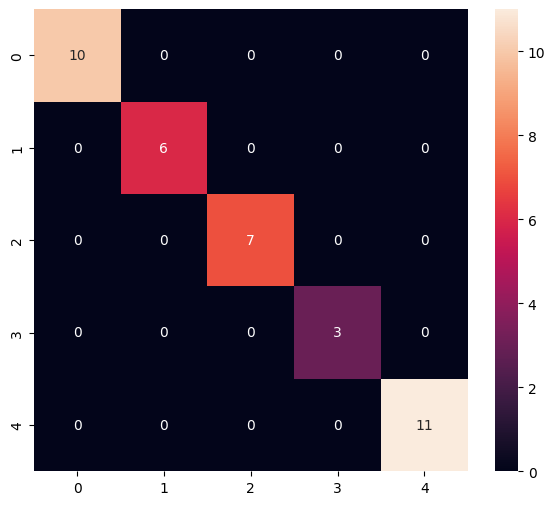

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        11

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# แปลงโมเดล สำหรับ Tensor Flow lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Piya\AppData\Local\Temp\tmpbflsmk_h\assets


6588

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.2589815e-06 8.0191697e-08 1.4573989e-09 1.4429443e-03 9.9855369e-01]
4
